# 高速フーリエ変換

高速フーリエ変換は離散フーリエ変換の高速なアルゴリズム

## 1の原始$N$乗根による表現


:::{admonition} 1の原始$N$乗根

$\omega_N$を次のように定義する。

$$
\omega_N := e^{i 2 \pi / N}
$$

これは$N$次方程式$z^N-1=0$の解であり、次の関係を満たす。

$$
\omega_N^N=1, \quad \omega_N^k \neq 1, \quad k=1,2, \ldots, N-1
$$

上の式を満たす$\omega_N$を **1の原始$N$乗根** と呼ぶ。

:::

$\omega_N$を用いると、離散フーリエ変換の式

$$
f_l=\sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N}, \quad F_k=\frac{1}{N} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}
$$

は次のように書くことができる

$$
f_l=\sum_{k=0}^{N-1} F_k \omega_N^{k l}, \quad F_k=\frac{1}{N} \sum_{l=0}^{N-1} f_l \omega_N^{-k l}
$$

:::{tip} フーリエ変換は線形変換

上記だけだと「$e^{i 2 \pi / N}$を$\omega_N$に置き換えただけじゃないの？」と思ってしまいがちだが、
1つの係数$f_l$の$F_k$との間の変換ではなく、$f_0,\dots,f_{N-1}$と$F_0,\dots,F_{N-1}$の間の **線形変換** になっていることが大切。（離散フーリエではなく連続のフーリエ変換も数学的には線形変換）

:::

ベクトルと行列の形で書くと以下になる。

$$
\left(\begin{array}{c}
f_0 \\
f_1 \\
f_2 \\
\vdots \\
f_{N-1}
\end{array}\right)=\left(\begin{array}{ccccc}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_N & \omega_N^2 & \cdots & \omega_N^{N-1} \\
1 & \omega_N^2 & \omega_N^4 & \cdots & \omega_N^{2(N-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & \omega_N^{N-1} & \omega_N^{2(N-1)} & \cdots & \omega_N^{(N-1)(N-1)}
\end{array}\right)\left(\begin{array}{c}
F_0 \\
F_1 \\
F_2 \\
\vdots \\
F_{N-1}
\end{array}\right)
$$

$$
\left(\begin{array}{c}
F_0 \\
F_1 \\
F_2 \\
\vdots \\
F_{N-1}
\end{array}\right)=\frac{1}{N}\left(\begin{array}{ccccc}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_N^{-1} & \omega_N^{-2} & \cdots & \omega_N^{-(N-1)} \\
1 & \omega_N^{-2} & \omega_N^{-4} & \cdots & \omega_N^{-2(N-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & \omega_N^{-(N-1)} & \omega_N^{-2(N-1)} & \cdots & \omega_N^{-(N-1)(N-1)}
\end{array}\right)\left(\begin{array}{c}
f_0 \\
f_1 \\
f_2 \\
\vdots \\
f_{N-1}
\end{array}\right)
$$


離散フーリエ変換を計算するには、長さ$N$の任意の数列$a_0, a_1, a_2, \ldots, a_{N-1}$に対して

$$
b_k=\sum_{l=0}^{N-1} a_l \omega_N^{k l}, \quad k=0,1,2, \ldots, N-1
$$

となる数列$b_0, b_1, b_2, \ldots, b_{N-1}$が計算できればよい

:::{dropdown}

$\{ F_k \}$ から $\{f_l\}$を計算するには、$b_k = f_l$, $a_k = F_k$とおけば

$$
f_l =\sum_{k=0}^{N-1} F_k \omega_N^{k l}
$$

が成り立つ。

$\{f_l\}$ から $\{ F_k \}$ を計算するには、$\overline{\omega_N}=\omega_N^{-1}$ であるから 

$$
F_k=\frac{1}{N} \overline{\sum_{l=0}^{N-1} \overline{f_l} \omega_N^{k l}}
$$

:::

## 高速フーリエ変換

$N$が2の冪乗であれば、離散フーリエ変換の計算が効率化される（具体的には$O(N)$ から $O(N\log N)$になる）これを使うのが高速フーリエ変換。

### 単位円での表現

1の原始$N$乗根$\omega_N$を次々と冪乗すると、複素平面の単位円周上を回転する

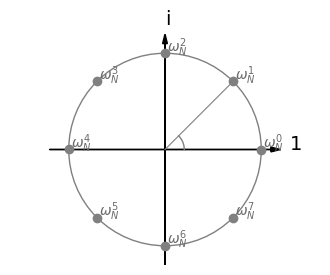

In [10]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))
ax.set_aspect('equal', 'box')

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "1", fontsize=14, color='black')
ax.text(0, 1.3, "i", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

# 単位円
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(unit_circle)

# 偶数のN
n = 8
omega_n = cmath.exp(2j * cmath.pi / n)

ax.plot([0, omega_n.real], [0, omega_n.imag], color="gray", linestyle='-', linewidth=0.8)
t = 2 * np.pi / n
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, color="gray", linewidth=1)

for k in range(n):
    omega = omega_n**k
    ax.plot(omega.real, omega.imag, 'o', color="gray")
    ax.text(omega.real + 0.02, omega.imag + 0.02, rf'$\omega_N^{k}$', fontsize=10, color="dimgray", ha='left')

plt.show()

:::{card} 定理

$N$が偶数のとき、次の関係が成り立つ

$$
\omega_N^{N / 2}=-1, \quad \omega_N^{N / 2+1}=-\omega_N, \quad \omega_N^{N / 2+2}=-\omega_N^2, \quad \ldots, \quad \omega_N^{N-1}=-\omega_N^{N / 2-1}
$$

:::

:::{dropdown} 証明

定義 $\omega_N := e^{i 2 \pi / N}$ より、

$$
\omega_N^{N / 2} = \left(e^{i 2 \pi / N}\right)^{N / 2}
 =e^{i \pi}=-1
$$

である。ゆえに

$$
\omega_N^{N / 2+k} = \omega_N^{N / 2} \omega_N^k=-\omega_N^k
$$


:::

例えば$N=8$のときは、$\omega_{N}^{N/2} = \omega_{N}^{4} = -1 = -\omega_{N}^{0}$であり、$\omega_{N}^{N/2+1} = \omega_{N}^{5} = -\omega_{N}^{1} = -\omega_{N}$である。以下同様。

単位円で描くとちょうど反対側に位置する。

そのため、 **$N/2$個の$\omega_N$についてのみ考えればよい** ことがわかる。

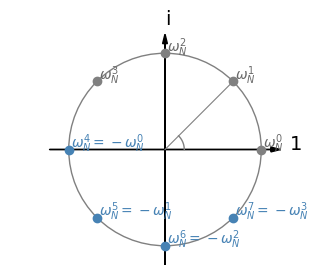

In [35]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))
ax.set_aspect('equal', 'box')

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "1", fontsize=14, color='black')
ax.text(0, 1.3, "i", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

# 単位円
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(unit_circle)

# 偶数のN
n = 8
omega_n = cmath.exp(2j * cmath.pi / n)

ax.plot([0, omega_n.real], [0, omega_n.imag], color="gray", linestyle='-', linewidth=0.8)
t = 2 * np.pi / n
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, color="gray", linewidth=1)

for k in range(n // 2):
    omega = omega_n**k
    ax.plot(omega.real, omega.imag, 'o', color="gray")
    ax.text(omega.real + 0.02, omega.imag + 0.02, rf'$\omega_N^{k}$', fontsize=10, color="dimgray", ha='left')

    omega = -1 * omega
    k2 = k + n // 2
    ax.plot(omega.real, omega.imag, 'o', color="steelblue")
    ax.text(omega.real + 0.02, omega.imag + 0.02, rf'$\omega_N^{k2} = -\omega_N^{k}$', fontsize=10, color="steelblue", ha='left')

plt.show()

:::{card} 定理

$N$が偶数のとき、$\omega^2_N$は1の原始$N/2$乗根として表せる。

$$
\omega_N^2=\omega_{N / 2}
$$
:::

:::{dropdown} 証明

$\omega_N^2=\left(e^{i 2 \pi / N}\right)^2=e^{i 4 \pi / N}=e^{i 2 \pi /(N / 2)}=\omega_{N / 2}$ となる
:::

前出の定理より、$\omega_{N}^{2k} = \omega_{N / 2}^k$となっている。例えば$\omega_{N}^{4} = \omega_{N / 2}^2$となっている

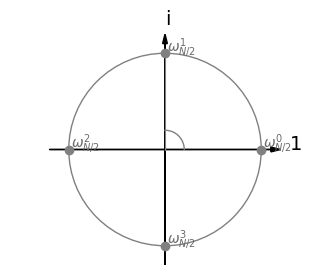

In [8]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))
ax.set_aspect('equal', 'box')

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "1", fontsize=14, color='black')
ax.text(0, 1.3, "i", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

# 単位円
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(unit_circle)

# 偶数のN
n = 4
omega_n = cmath.exp(2j * cmath.pi / n)

ax.plot([0, omega_n.real], [0, omega_n.imag], color="gray", linestyle='-', linewidth=0.8)
t = 2 * np.pi / n
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, color="gray", linewidth=1)

for k in range(n):
    omega = omega_n**k
    ax.plot(omega.real, omega.imag, 'o', color="gray")
    ax.text(omega.real + 0.02, omega.imag + 0.02, rf'$\omega_{{N/2}}^{k}$', fontsize=10, color="dimgray", ha='left')

plt.show()

$N-1$ 次多項式

$$
f(x)=a_0+a_1 x+a_2 x^2+\cdots+a_{N-1} x^{N-1}=\sum_{l=0}^{N-1} a_l x^l
$$

を定義すると


$$
b_k=\sum_{l=0}^{N-1} a_l \omega_N^{k l}, \quad k=0,1,2, \ldots, N-1
$$

は

$$
b_k=f\left(\omega_N^k\right), \quad k=0,1,2, \ldots, N-1
$$

と書くことができる。

つまり、 **複素平面上の単位円周の$N$等分点で$N-1$次多項式$f(x)$を計算すれば$b_0,b_1,\dots,b_N$が得られる**。

この計算を$\operatorname{FFT}_N[f(x)]$と表す。

$$
\operatorname{FFT}_N[f(x)]=\{f(1), f(\omega_N), f(\omega_N^2), \ldots, f(\omega_N^{N-1})\}
$$



### 間引き

上記の多項式は次のように書き直せる

$$
\begin{aligned}
f(x)= & a_0+a_1 x+a_2 x^2+\cdots+a_{N-1} x^{N-1}\\
= & a_0+a_2 x^2+a_4 x^4+\cdots+a_{N-2} x^{N-2} \\
  & +x\left(a_1+a_3 x^2+a_5 x^4+\cdots+a_{N-1} x^{N-2}\right) \\
= & p(x^2)+x q(x^2)
\end{aligned}
$$

ただし、

$$
\left\{\begin{array}{l}
p(x)=a_0+a_2 x+a_4 x^2+\cdots+a_{N-2} x^{N / 2-1} \\
q(x)=a_1+a_3 x+a_5 x^2+\cdots+a_{N-1} x^{N / 2-1}
\end{array}\right.
$$

とおいた。この係数の **間引き** は高速フーリエ変換における重要な計算手順の一つ。

$p(x^2)$は$x$が複素平面上の単位円周の$N$等分点を順にたどって1周するとき **$x^2$はそれらを1つおきに進んで2周する** 。そのため **前半の$N/2$個のみを計算すればよい** から、

$$
\operatorname{FFT}_{N}[p(x^2)]=\{p(1), p(\omega_N^2), p(\omega_N^4), \ldots, p(\omega_N^{N-2})\}
$$

となる。


また「$N$が偶数のとき$\omega_N^2=\omega_{N / 2}$」という定理より以下のように書き直せる。

$$
\operatorname{FFT}_{N}[p(x^2)]=\{p(1), p(\omega_{N/2}), p(\omega_{N/2}^2), \ldots, p(\omega_{N/2}^{N/2-1})\}
$$

→ **データ数$N/2$個の離散フーリエ変換** を計算すればいい。

$q(x^2)$についても同様に得られる。

$$
\operatorname{FFT}_{N}[q(x^2)]=\{q(1), q(\omega_{N/2}), q(\omega_{N/2}^2), \ldots, q(\omega_{N/2}^{N/2-1})\}
$$

これら$N/2$個の離散フーリエ変換で得られるものたちを以下のように$\operatorname{FFT}_{N / 2}$と表記する

$$
\operatorname{FFT}_N[p(x^2)]=\operatorname{FFT}_{N / 2}[p(x)], \quad \operatorname{FFT}_N[q(x^2)]=\operatorname{FFT}_{N / 2}[q(x)]
$$

### バタフライ

$f(x)$は「$N$が偶数のとき、$\omega_N^{N / 2}=-1, \quad \omega_N^{N / 2+1}=-\omega_N, \quad \omega_N^{N / 2+2}=-\omega_N^2, \quad \ldots, \quad \omega_N^{N-1}=-\omega_N^{N / 2-1}$」という定理と
$f(x) = p(x^2)+x q(x^2)$ により、以下のように計算できる。

$$
\begin{cases}
f(\omega_N^k)=p(\omega_{N / 2}^k)+\omega_N^k q(\omega_{N / 2}^k), & k=0,1, \ldots, N / 2-1 \\
f(\omega_N^{N / 2+k})=p(\omega_{N / 2}^k)-\omega_N^k q(\omega_{N / 2}^k), & k=0,1, \ldots, N / 2-1
\end{cases}
$$

この計算を **バタフライ** と呼び、式中の$\omega_N^k$を **回転因子（ひねり因子）** と呼ぶ。

:::{dropdown} 考察：なぜ引数は$\omega_{N / 2}^k$なのに回転因子は$\omega_N^k$なのか？

$f(x)= p(x^2)+x q(x^2)$なのと同様の形になっていると思われる。

:::

:::{dropdown} 考察：$f(\omega_N^{N / 2+k})=p(\omega_{N / 2}^k)-\omega_N^k q(\omega_{N / 2}^k)$で$-\omega_N^k$とマイナスがつくのはなぜ？

前述の定理より、$\omega_N^{N / 2+k} = -\omega_N^{k}$

:::

### 高速フーリエ変換

$\operatorname{FFT}_N$は係数の間引き（Decimation-In-Time, DIT）$D_N$を行って$\operatorname{FFT}_{N/2}$を実行し、バタフライ$B_N$を施す。

間引きによって$\operatorname{FFT}_{N/4}, \operatorname{FFT}_{N/8}, \operatorname{FFT}_{N/16}, \dots$と分解していくと最終的に$\operatorname{FFT}_{1}$の計算になり、$0$次式（定数）の計算になる。

その後バタフライによって統合していく。

そのため$\operatorname{FFT}_{N}$は間引きの繰り返しとバタフライの繰り返しで分割統治法によって計算できる。

この方法を **高速フーリエ変換** （FFT）と呼ぶ。

## Pythonの実装

by chatGPT

In [2]:
import cmath

def fft_recursive(x: list[complex]) -> list[complex]:
    """
    Args: 入力信号（複素数リスト）
    Returns: FFTの結果（周波数成分Fのリスト）（複素数のリスト）
    """
    N = len(x)
    if N <= 1:  # 再帰の終了条件
        return x

    # 偶数番目と奇数番目に分割
    even = fft_recursive(x[0::2])
    odd = fft_recursive(x[1::2])

    # バタフライ操作
    T = [cmath.exp(-2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]


In [3]:
# テスト用データ
input_signal = [0, 1, 2, 3, 4, 5, 6, 7]  # サンプルデータ

# 信号を複素数に変換
input_signal = [complex(x) for x in input_signal]

# FFTを計算
fft_result = fft_recursive(input_signal)

# 結果を表示
print("FFTの結果:")
for i, value in enumerate(fft_result):
    print(f"X[{i}] = {value:.3f}")

# NumPyによるFFT計算
import numpy as np
fft_result = np.fft.fft(input_signal)

# 結果を表示
print("NumPy FFT結果:")
for i, value in enumerate(fft_result):
    print(f"X[{i}] = {value:.3f}")

FFTの結果:
X[0] = 28.000+0.000j
X[1] = -4.000+9.657j
X[2] = -4.000+4.000j
X[3] = -4.000+1.657j
X[4] = -4.000+0.000j
X[5] = -4.000-1.657j
X[6] = -4.000-4.000j
X[7] = -4.000-9.657j
NumPy FFT結果:
X[0] = 28.000+0.000j
X[1] = -4.000+9.657j
X[2] = -4.000+4.000j
X[3] = -4.000+1.657j
X[4] = -4.000+0.000j
X[5] = -4.000-1.657j
X[6] = -4.000-4.000j
X[7] = -4.000-9.657j


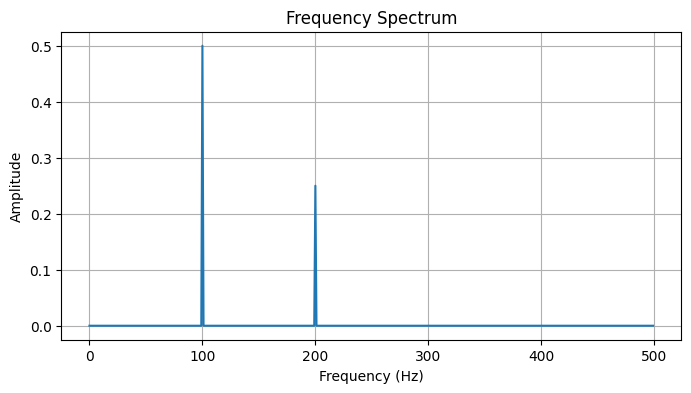

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# サンプル信号を作成（サンプリング周波数: 1000 Hz）
fs = 1000  # サンプリング周波数
t = np.linspace(0, 1, fs, endpoint=False)  # 時間軸
frequencies = [100, 200]
signal = np.sin(2 * np.pi * frequencies[0] * t) + 0.5 * np.sin(2 * np.pi * frequencies[1] * t)

# FFTを計算
N = len(signal)
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N, 1/fs)  # 周波数軸

# 振幅スペクトルを取得
amplitude = np.abs(fft_result) / N  # 振幅正規化

# 結果をプロット
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:N//2], amplitude[:N//2])  # 正の周波数成分のみプロット
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
